Multimedia Security and Privacy  
Lea Heiniger  
25.05.2023   
  
  # TP3: Elements of Detection Theoryion
  

In [1]:
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt

## 1 Elements of Detection Theory  



### Exercise 1  
Let $X\sim\mathcal{N}(0,1)$ and $Y\sim\mathcal{N}(0,3)$ :  
- $\displaystyle P[-2<Y\leq 1]=\Phi\left(\frac{1-0}{3}\right)-\Phi\left(\frac{-2-0}{3}\right)=\Phi\left(\frac{1}{3}\right)-\left(1-\Phi\left(\frac{2}{3}\right)\right)$   
  
- $\displaystyle P[Y>5.5]=1-P[Y\leq 5.5]=1-\Phi\left(\frac{5.5}{3}\right)$ 
  
- $\displaystyle P[-2<X\leq 2]=\Phi\left(\frac{2-0}{1}\right)-\Phi\left(\frac{-2-0}{1}\right)=\Phi(2)-(1-\Phi(2))$  
  
- $\displaystyle P[X>1.5]=1-P[X\leq 1.5]=1-\Phi(1.5)$

In [2]:
muX, sigmaX = 0, 1
muY, sigmaY = 0, 3

print("P[-2<Y<=1] = ", norm.cdf(1, muY, sigmaY)-norm.cdf(-2, muY, sigmaY))
print("P[Y>5.5]   = ", norm.sf(5.5, muY, sigmaY))
print("P[-2<X<=2] = ", norm.cdf(2, muX, sigmaX)-norm.cdf(-2, muX, sigmaX))
print("P[X>1.5]   = ", norm.sf(1.5, muX, sigmaX))

P[-2<Y<=1] =  0.3780661222713134
P[Y>5.5]   =  0.03337650758481726
P[-2<X<=2] =  0.9544997361036416
P[X>1.5]   =  0.06680720126885807


### Exercise 2  
Let $X$ denote the peak temperature in Geneva, in June, as measured in Celsius, for which holds:
$X\sim\mathcal{N}(27, 9)$ :  
- $\displaystyle P[X>35]=1-P[X\leq 35]=1-\Phi\left(\frac{35-27}{9}\right) =1-\Phi\left(\frac{8}{9}\right)$  
  
- $\displaystyle P[X\leq 5]=\Phi\left(\frac{5-27}{9}\right)=1-\Phi\left(\frac{22}{9}\right)$  
  
- $\displaystyle P[20<X\leq 40]=\Phi\left(\frac{40-27}{9}\right)-\Phi\left(\frac{20-27}{9}\right)=\Phi\left(\frac{13}{9}\right)-\left(1-\Phi\left(\frac{7}{9}\right)\right)$

In [3]:
mu, sigma = 27, 9

print("P[X>35]     = ", norm.sf(35, mu, sigma))
print("P[X<=5]     = ", norm.cdf(5, mu, sigma))
print("P[20<X<=40] = ", norm.cdf(40, mu, sigma)-norm.cdf(20, mu, sigma))

P[X>35]     =  0.18703139874544122
P[X<=5]     =  0.007253771124867817
P[20<X<=40] =  0.7073429864110152


### Exercise 3  
We know that $X$ is a Gaussian random variable, for which $E[X] = 0$ and $P[|X|\leq 10] = 0.3$. We want to find the value of $\sigma_{X}$ :  
  
We set $X\sim\mathcal{N}(0,\sigma_{X})$.  
$
$$\displaystyle~~~~~P[\vert X\vert\leq 10]=0.3 \\
\displaystyle\Leftrightarrow P[-10<X\leq 10]=0.3\\
\displaystyle\Leftrightarrow \Phi\left(\frac{10-0}{\sigma_{X}}\right)-\Phi\left(\frac{-10-0}{\sigma_{X}}\right)=0.3\\
\displaystyle\Leftrightarrow \Phi\left(\frac{10}{\sigma_{X}}\right)-\left(1-\Phi\left(\frac{10}{\sigma_{X}}\right)\right)=0.3\\
\displaystyle\Leftrightarrow 2\cdot\Phi\left(\frac{10}{\sigma_{X}}\right) = 1.3\\
\displaystyle\Leftrightarrow \Phi\left(\frac{10}{\sigma_{X}}\right) = 0.65\\
\Leftrightarrow \sigma_{X}=\displaystyle\frac{10}{\Phi^{-1}~(0.65)}$$
$

In [4]:
print("sigmaX = ", 10 / norm.ppf(0.65))

sigmaX =  25.95242368834525


### Exercise 4  
We want to prove that $Q(n)=\displaystyle\frac{1}{2}erfc\left(\frac{n}{\sqrt{2}}\right)$ :  
$Q(n) =\displaystyle\frac{1}{\sqrt{2\pi}}\int_{n}^{\infty}e^{\displaystyle\frac{-x^{2}}{2}}dx=\frac{1}{2}\left(\frac{2}{\sqrt{\pi}}\int_{n/\sqrt{2}}^{\infty}e^{-x^{2}}dx\right)=\frac{1}{2}-\frac{1}{2}erf\left(\frac{n}{\sqrt{2}}\right)= \frac{1}{2}erfc\left(\frac{n}{\sqrt{2}}\right)$

## 3 Neyman-Pearson Test  

### Exercise 5  
Let there be two hypothesizes, $H_{0} : X=Z$ and $H_{1} : X=\mu_{1}+Z$ where $Z\sim\mathcal{N}(0,1)$ and $\mu_{1}=1$.  

- We want to determine the separation threshold $\tau$ following the MAP hypothesis, or likelihood ratio test :  
We define $P[H_{0}]=p$ and $P[H_{1}]=1-p$.  
The likelihood function is
$
$$
f_{X\vert H_{0}}~(x) = \displaystyle\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\displaystyle\frac{-x^{2}}{2\sigma^{2}}}\\
f_{X\vert H_{1}}~(x) = \displaystyle\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\displaystyle\frac{-(x+\mu_{1})^{2}}{2\sigma^{2}}}
$$
$  
And the MAP hypothesis is  
$x \in A_{0}$, if $\displaystyle\frac{f_{X\vert H_{0}}~(x)}{f_{X\vert H_{1}}~(x)}\geq \displaystyle\frac{P[H_{1}]}{P[H_{0}]}$  
$x \in A_{1}$, otherwise  
  
for $x \in A_{0}$ :  
$
$$
\displaystyle~~~~~\frac{f_{X\vert H_{0}}~(x)}{f_{X\vert H_{1}}~(x)}\geq \displaystyle\frac{P[H_{1}]}{P[H_{0}]}\\
\Leftrightarrow\displaystyle\frac{\displaystyle\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\displaystyle\frac{-x^{2}}{2\sigma^{2}}}}{\displaystyle\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\displaystyle\frac{-(x+\mu_{1})^{2}}{2\sigma^{2}}}} \geq \frac{1-p}{p}\\
\Leftrightarrow\displaystyle\frac{e^{\displaystyle\frac{-x^{2}}{2\sigma^{2}}}}{e^{\displaystyle\frac{-(x+\mu_{1})^{2}}{2\sigma^{2}}}}~\geq \frac{1-p}{p}\\
\Leftrightarrow ln\left(\displaystyle\frac{e^{\displaystyle\frac{-x^{2}}{2\sigma^{2}}}}{e^{\displaystyle\frac{-(x+\mu_{1})^{2}}{2\sigma^{2}}}}\right) \geq ln\left(\frac{1-p}{p}\right)\\
\Leftrightarrow\displaystyle\frac{-2x\mu_{1}+\mu_{1}^{2}}{2\sigma^{2}}\geq ln\left(\frac{1-p}{p}\right)\\
\Leftrightarrow -2x\mu_{1}\geq 2\sigma^{2} ln\left(\frac{1-p}{p}\right) - \mu_{1}^{2}\\
\Leftrightarrow x\leq \displaystyle\frac{2\sigma^{2} ln\left(\frac{1-p}{p}\right) - \mu_{1}^{2}}{-2\mu_{1}}\\
\Rightarrow \tau = \displaystyle -\frac{\sigma^{2}}{\mu_{1}} ln\left(\frac{1-p}{p}\right) + \frac{\mu_{1}}{2}
$$
$
  
- We want to determine the probability of correct detection $p_{d} = 1 − p_{m}$ :  
$p_{d}=1-P(A_{0}\vert H_{1})= 1-\displaystyle\int_{x<\tau}f_{x\vert H_{1}}(x)dx = 1-\Phi(\tau -1)= 1- \Phi\left(\displaystyle -\frac{\sigma^{2}}{\mu_{1}} ln\left(\frac{1-p}{p}\right) + \frac{\mu_{1}}{2}-1\right)$

### Exercise 6  
Let there be two hypothesizes, $H_{0} : X=Z$ and $H_{1} : X=\mu_{1}+Z$ where $Z\sim\mathcal{N}(0,1)$ and $\mu_{1}=\lbrace 0, 1, 2 \rbrace$.  
From exercise 5 we have :  
- $p_{m} = P(A_{0}\vert H_{1}) = \Phi(\tau-\mu_{1})= \Phi\left(\displaystyle -\frac{\sigma^{2}}{\mu_{1}} ln\left(\frac{1-p}{p}\right) + \frac{\mu_{1}}{2}-\mu_{1}\right)$  
  
- $p_{d} = 1-p_{m} =1-\Phi\left(\displaystyle -\frac{\sigma^{2}}{\mu_{1}} ln\left(\frac{1-p}{p}\right) + \frac{\mu_{1}}{2}-\mu_{1}\right)$  
  
- $p_{f}=P[A_{1}\vert H_{0}]=P[X<\tau\vert H_{0}] = 1-\Phi(\tau)= 1- \Phi\left(\displaystyle -\frac{\sigma^{2}}{\mu_{1}} ln\left(\frac{1-p}{p}\right) + \frac{\mu_{1}}{2}-1\right)$

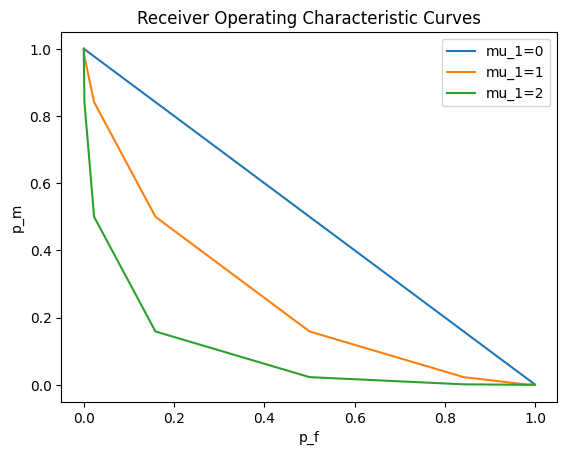

In [5]:
list_tau = list(range(-3,7))
p_f = 1-norm.cdf(list_tau)
mu_1 = [0, 1, 2]
l=[]
for mu in mu_1:
    p_m = [norm.cdf(tau-mu) for tau in list_tau]
    plt.plot(p_f, p_m)
    l.append(f'mu_1={mu}')
plt.legend(l)
plt.xlabel('p_f')
plt.ylabel('p_m')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

* If $\mu_{1}=0$ :  
$H_{0} = H_{1} \Rightarrow p_{m} = p_{f}$ therefor the signal recieved is the same wether there is a target or not. We can see it on the graph, the Reciever Operating Characteristic is a straight line.  
  
* If $\mu_{1}=1$ or $\mu_{1}=2$ :  
Here $H_{0}$ and $H_{1}$ are distinct. We can see that the higher the value of $\mu_{1}$ is (meaning that the difference between $H_{0}$ and $H_{1}$ is higher), the better the detection.

### Exercise 7  
* The hypotheses are $H_{0}: Y=W$ and $H_{1}: Y=V+W$ (where $V$ and $W$ are independent and identicaly distributed exponential variables)  
  
* Using the binary hypothesis likelihood ratio test we determine the rule that minimises $p_{err}$ :  
$
$$
\displaystyle~~~~~\frac{f_{Y\vert H_{0}}~(y)}{f_{Y\vert H_{1}}~(y)}\geq \displaystyle\frac{P[H_{1}]}{P[H_{0}]}\\
\displaystyle \Leftrightarrow \frac{f_{Y\vert H_{0}}~(y)}{f_{Y\vert H_{1}}~(y)}\geq \displaystyle\frac{0.5}{0.5}=1\\
\displaystyle \Leftrightarrow \frac{e^{-y}}{ye^{-y}} \geq 1\\
\displaystyle \Leftrightarrow ln\left( \frac{e^{-y}}{ye^{-y}}\right) \geq ln(1)\\
\displaystyle \Leftrightarrow ln(e^{-y})-ln(ye^{-y}) \geq 0\\
\displaystyle \Leftrightarrow -y-ln(y)+y\geq 0\\
\displaystyle \Leftrightarrow ln(y) \leq 0\\
\displaystyle \Leftrightarrow y\leq 1
$$
$
the minimising rule is $\tau = 1$  
  
* Using the optimum decision rule we determine $p_{err}$ :  
$
$$
\displaystyle~~~~~ p_{err}=P(A_{1}\vert H_{0})\cdot P(H_{0})+P(A_{0}\vert H_{1})\cdot P(H_{1})\\
\displaystyle \Leftrightarrow p_{err} = \frac{1}{2}P(A_{1}\vert H_{0})+\frac{1}{2}P(A_{0}\vert H_{1})\\
\displaystyle \Leftrightarrow p_{err} = \frac{1}{2}\displaystyle \int_{y>\tau}f_{Y\vert H_{0}}~(y)~dy +\frac{1}{2}\displaystyle \int_{y<\tau}f_{Y\vert H_{1}}~(y)~dy\\
\displaystyle \Leftrightarrow p_{err} = \frac{1}{2}\displaystyle \int_{1}^{\infty}e^{-y}~dy +\frac{1}{2}\displaystyle \int_{0}^{1}ye^{-y}~dy\\
\displaystyle \Leftrightarrow p_{err} = \frac{1}{2}\left(\frac{1}{e}+\frac{e-22}{e}\right)= \frac{1}{2}\left(1-\frac{1}{e}\right)
$$
$